Shape determinants of an Aneurysm.

volume (V) ----------------------------------------------------------------
max diameter (Dm)
surface area (S)   ----------------------------------------------------------------
height (H) 
neck diameter (Dn) 
undulation index (UI) ----------------------------------------------------------------
aspect ratio (AR) : (H/Dn)  
ellipticity index (EI) ----------------------------------------------------------------
nonsphericity index (NSI) ----------------------------------------------------------------
conicity parameter (CP) 
bottleneck factor (BF) 
mean curvature norm (MLN) ----------------------------------------------------------------
gaussian curvature norm (GLN) ----------------------------------------------------------------

In [4]:
# ! pip install trimesh
# ! pip install pandas
# ! pip install matplotlib
# ! pip install networkx
# ! pip install rtree

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rtree from https://files.pythonhosted.org/packages/8b/30/e25d4611d1da97aa58c03a6e582c6c4034536cd3c2a9bb1531f5f7775296/Rtree-1.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/481.9 kB ? eta -:--:--
    --------------------------------------- 10.2/481.9 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/481.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 440.3/481.9 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 481.9/481.9 kB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import trimesh
import rtree
import math
import seaborn as sns
import statistics
from trimesh.curvature import discrete_gaussian_curvature_measure,  discrete_mean_curvature_measure, sphere_ball_intersection
import networkx as nx


In [7]:
print(trimesh.__version__)

4.2.0


In [5]:
df_cpc_mpc = pd.read_csv("merged_aneurysm_data.csv")
# df_clinical = pd.read_csv("./AneuX dataset/clinical.csv")
# df_mpc = pd.read_csv("./AneuX dataset/per_source/area-005/morpho-per-cut-flat.csv")

dome_mesh = trimesh.load_mesh("./dome_model.stl")
dome_mesh_v_1 = trimesh.load_mesh("./V-1.stl")
# Print the edges
print("Edges:")
print(dome_mesh.edges)

# Print the faces
print("Faces:")
print(dome_mesh.faces)

# Print the vertices
print("Vertices:")
print((dome_mesh.vertices))

Edges:
[[   0    1]
 [   1    2]
 [   2    0]
 ...
 [ 996 1198]
 [1198 1031]
 [1031  996]]
Faces:
[[   0    1    2]
 [   3    4    5]
 [   2    1    3]
 ...
 [1146 1031 1198]
 [1031 1146 1109]
 [ 996 1198 1031]]
Vertices:
[[43.38034058 45.13111877 39.1157341 ]
 [43.32600021 45.17370224 39.13330078]
 [43.38864136 45.18005753 39.16732025]
 ...
 [38.41059875 49.1012001  42.75749969]
 [38.24670029 48.92760086 42.77939987]
 [38.40069962 48.99470139 42.96290207]]


In [26]:
d=dome_mesh.show(smooth=True, background_color=(0.7, 0.7, 0.9), figsize=(1200, 800))
dv1=dome_mesh_v_1.show(smooth=True, background_color=(0.7, 0.7, 0.9), figsize=(1200, 800))
dome_mesh.show(smooth=True, background_color=(0.7, 0.7, 0.9), figsize=(1200, 800))

In [27]:
dome_mesh_v_1.show(smooth=True, background_color=(0.7, 0.7, 0.9), figsize=(1200, 800))

In [28]:
dome_mesh_hull = trimesh.convex.convex_hull(dome_mesh)
print("This is the convex hull of the aneurysm V-0")
dome_mesh_v1_hull = trimesh.convex.convex_hull(dome_mesh_v_1)


dome_mesh_hull.show()

This is the convex hull of the aneurysm V-0


In [29]:
dome_mesh_v1_hull.show()

In [31]:
def Undulation_index(x):
   return (1 - (x.volume/ x.convex_hull.volume))

UI_v0 = Undulation_index(dome_mesh)
print("This is Undulation Index for v0:",UI_v0)
UI_v1 = Undulation_index(dome_mesh_v_1)
print("This is Undulation Index for v1:",UI_v1)


This is Undulation Index for v0: 0.10071186663314602
This is Undulation Index for v1: 0.07831584088335763


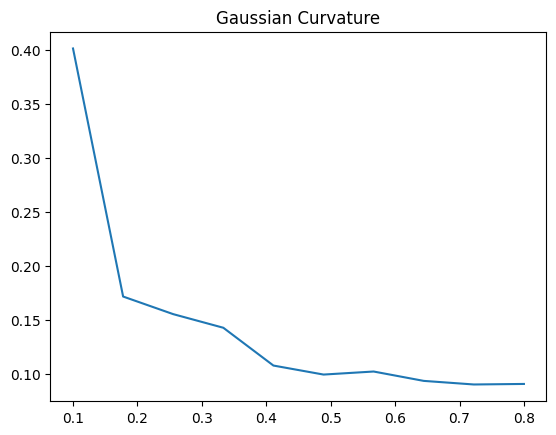

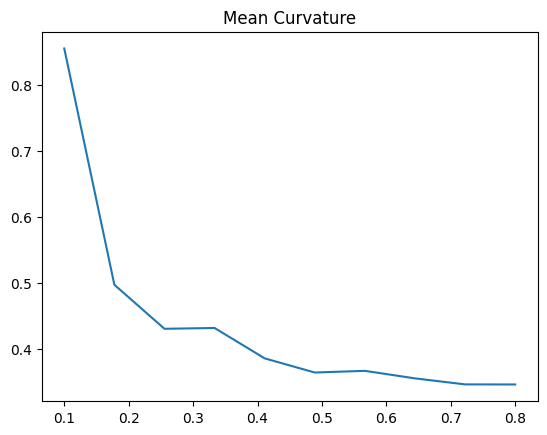

[0.40161269 0.17158989 0.15526495 0.14264294 0.10759782 0.09923777
 0.10205981 0.09337378 0.09004359 0.09053571]


In [46]:
# vn = dome_mesh.vertex_normals
# mean_curvature = trimesh.curvature.discrete_mean_curvature_measure(dome_mesh.vertices, vn,radius=0.1)
# mean_curvature

radii = np.linspace(0.1, 0.8, 10)
gauss = np.array([discrete_gaussian_curvature_measure(dome_mesh, dome_mesh.vertices, r)/sphere_ball_intersection(1, r) for r in radii])
mean_curv = np.array([discrete_mean_curvature_measure(dome_mesh, dome_mesh.vertices, r)/sphere_ball_intersection(1, r) for r in radii])

plt.figure()
plt.plot(radii, gauss.mean(axis=1))
plt.title('Gaussian Curvature')
plt.show()

plt.figure()
plt.plot(radii, mean_curv.mean(axis=1))
plt.title('Mean Curvature')
plt.show()
print(gauss.mean(axis=1))

In [47]:
print(radii)

[0.1        0.17777778 0.25555556 0.33333333 0.41111111 0.48888889
 0.56666667 0.64444444 0.72222222 0.8       ]


In [49]:

# gc_array=discrete_gaussian_curvature_measure(dome_mesh,dome_mesh.vertices,0)
# print(statistics.mean(gc_array), "mean of the gaussian curvature")
# #Normalize the gaussian curvature with a sphere of similar volume

# pi = math.pi

# # Solve for the radius
# sphere_radius = np.cbrt(dome_mesh.volume / (4/3 * pi))

# #theoretically sphere curvature is 1/r^2
# theoretical_curvature = 1 / (sphere_radius**2)
# normalized_curvature = gc_array / theoretical_curvature
# print(statistics.mean(normalized_curvature))

def calculate_GLN_MLN_curvature_and_normalize(dome_mesh, target_volume):
  """
  Calculates discrete Gaussian curvature, normalizes against a target sphere,
  and returns potential estimates for MLN and GLN.

  Args:
      dome_mesh: A trimesh mesh object representing the aneurysm dome.
      target_volume: The volume of the target sphere for normalization (e.g., 230).

  Returns:
      A tuple containing:
          normalized_curvature: Array of normalized curvature values.
          potential_mln: Potential estimate of Mean curvature Local Normalized.
          potential_gln: Potential estimate of Gaussian curvature Local Normalized.
  """

  # Calculate sphere radius
  pi = math.pi
  sphere_radius = np.cbrt(target_volume / (4/3 * pi))

  # Get vertices and calculate curvature
  vertices = dome_mesh.vertices
  gaussian_curvature = trimesh.curvature.discrete_gaussian_curvature_measure(dome_mesh, vertices, radius=0.1)

  # Normalize curvature
  theoretical_curvature = 1 / (sphere_radius**2)
  normalized_curvature = gaussian_curvature / theoretical_curvature

  # Potential estimates for MLN and GLN (assuming uniform distribution)
  potential_mln = np.mean(normalized_curvature)
  potential_gln = np.mean(normalized_curvature**2)

  return potential_mln, potential_gln
  # return normalized_curvature if you want to 

# Assuming your dome mesh is loaded as dome_mesh
potential_mln, potential_gln = calculate_GLN_MLN_curvature_and_normalize(dome_mesh, target_volume=dome_mesh.volume)
potential_mln_v1, potential_gln_v1 = calculate_GLN_MLN_curvature_and_normalize(dome_mesh_v_1, target_volume=dome_mesh_v_1.volume)

print( potential_mln, potential_gln, "these are MLN_v0 and GLN_v0 estimates")
print( potential_mln_v1, potential_gln_v1, "these are MLN_v1 and GLN_v1 estimates")


0.121206263950124 0.6282079111397763 these are MLN_v0 and GLN_v0 estimates
0.12155522242598872 0.10717958722566873 these are MLN_v1 and GLN_v1 estimates


In [36]:
def Ellipcity_index(x):
    a = np.cbrt(18* math.pi)
    b = (np.cbrt(x.convex_hull.volume) ** 2)/(x.convex_hull.area)
    return 1 - a*b

EI = Ellipcity_index(dome_mesh)
EI_v1 = Ellipcity_index(dome_mesh_v_1)
print(EI, "is the Ellicpcity index of the Aneurysm v0")
print(EI_v1, "is the Ellicpcity index of the Aneurysm v1")

0.26348889745100845 is the Ellicpcity index of the Aneurysm v0
0.2651896655580046 is the Ellicpcity index of the Aneurysm v1


In [39]:
def Non_Sphericity_index(x):
    a = np.cbrt(18* math.pi)
    b = (np.cbrt(x.volume) ** 2)/(x.area)
    return 1 - a*b

NSI = Non_Sphericity_index(dome_mesh)
NSI_v1 = Non_Sphericity_index(dome_mesh_v_1)
print(NSI, "is the Non sphericity index of the Aneurysm v0")
print(NSI_v1, "is the Non sphericity index of the Aneurysm v1")



0.30125789614415066 is the Non sphericity index of the Aneurysm v0
0.29207295167527125 is the Non sphericity index of the Aneurysm v1


In [44]:
def Volumetric_shape_dets(x):
#     print("These are teh voolumetric shape determinants that need to be calculated for every patients DOME!!!")
#     print("We take the dome model, its convex hull as primary models for these shape determinants")

    UI = Undulation_index(x)
    potential_MLN, potential_GLN = calculate_GLN_MLN_curvature_and_normalize(x, target_volume=x.volume)
    EI = Ellipcity_index(x)
    NSI = Non_Sphericity_index(x)
    V = x.volume
    S = x.area

   
    print("Undulation Index: ", UI)
    print("potential_Mean curvature Normal: ", potential_MLN)
    print("potential_Gaussian Normal Curvature: ", potential_GLN)
    print("Ellipcity Index: ", EI)
    print("Non-sphercicty Index: ",NSI)
    print("Volume of the aneurysm dome: ",V )
    print("Surface are of the aneurysm dome: ",S)
    
    

In [45]:

print("\n\n")
print("The volumetric determinants of our aneurysm dome v0:\n\n")
Volumetric_shape_dets(dome_mesh)

print("\n\n")
print("The volumetric determinants of our aneurysm dome v1:\n\n")
Volumetric_shape_dets(dome_mesh_v_1)





The volumetric determinants of our aneurysm dome v0:


Undulation Index:  0.10071186663314602
potential_Mean curvature Normal:  0.06330338525631617
potential_Gaussian Normal Curvature:  0.38579034373944765
Ellipcity Index:  0.26348889745100845
Non-sphercicty Index:  0.30125789614415066
Volume of the aneurysm dome:  124.72119282146805
Surface are of the aneurysm dome:  137.1252344950458



The volumetric determinants of our aneurysm dome v1:


Undulation Index:  0.07831584088335763
potential_Mean curvature Normal:  0.009104095673509725
potential_Gaussian Normal Curvature:  0.002638335381394338
Ellipcity Index:  0.2651896655580046
Non-sphercicty Index:  0.29207295167527125
Volume of the aneurysm dome:  119.8169875117118
Surface are of the aneurysm dome:  131.77445154031437


In [6]:
cols=list(df_cpc_mpc.columns)
print(len(cols))
null_counts=df_cpc_mpc.isna().sum()
with pd.option_context('display.max_rows', 183):
    print(null_counts)



184
Unnamed: 0               0
source_x                 0
dataset                  0
cutType                  0
hospital                 0
                      ... 
zmi_surf.energy.n16    586
zmi_surf.energy.n17    586
zmi_surf.energy.n18    586
zmi_surf.energy.n19    586
zmi_surf.energy.n20    586
Length: 184, dtype: int64


In [7]:
df_cpc_mpc

Unnamed: 0  source_x                           dataset cutType hospital  \
0              0  aneurist                    ANSYS_UNIGE_09    cut1   Geneva   
1              1  aneurist                    ANSYS_UNIGE_09    dome   Geneva   
2              2  aneurist                    ANSYS_UNIGE_09   ninja   Geneva   
3              3  aneurist                    ANSYS_UNIGE_16    cut1   Geneva   
4              4  aneurist                    ANSYS_UNIGE_16    dome   Geneva   
...          ...       ...                               ...     ...      ...   
3417        3417   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB    cut0   Geneva   
3418        3418   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB    cut1   Geneva   
3419        3419   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB    cut2   Geneva   
3420        3420   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB    dome   Geneva   
3421        3421   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   ninja   Geneva   

          status location     side     sex   age  ... zmi_surf.energy.n11  \
0     unruptured  MCA bif    right  female  73.5  ...             30.6440   
1     unruptured  MCA bif    right  female  73.5  ...             20.9418   
2     unruptured  MCA bif    right  female  73.5  ...             19.9257   
3       ruptured   BA tip  midline  female  50.8  ...             35.7618   
4       ruptured   BA tip  midline  female  50.8  ...             20.8164   
...          ...      ...      ...     ...   ...  ...                 ...   
3417  unruptured      SCA     left    male  55.8  ...                 NaN   
3418  unruptured      SCA     left    male  55.8  ...             30.2896   
3419  unruptured      SCA     left    male  55.8  ...             48.2364   
3420  unruptured      SCA     left    male  55.8  ...             20.8420   
3421  unruptured      SCA     left    male  55.8  ...             20.8790   

     zmi_surf.energy.n12 zmi_surf.energy.n13 zmi_surf.energy.n14  \
0                34.1297             36.9670             38.8231   
1                24.2035             25.3240             26.5023   
2                23.2850             24.1501             25.4170   
3                37.7493             40.0477             42.2092   
4                22.1336             24.3699             25.8460   
...                  ...                 ...                 ...   
3417                 NaN                 NaN                 NaN   
3418             32.9288             37.0354             39.0979   
3419             49.8903             51.2432             54.4174   
3420             22.2618             24.0544             25.4506   
3421             22.6049             24.0854             26.4729   

      zmi_surf.energy.n15  zmi_surf.energy.n16  zmi_surf.energy.n17  \
0                 40.5633              41.9360              43.5888   
1                 27.8519              29.7922              31.5633   
2                 26.6573              28.4424              29.9027   
3                 44.2713              46.3125              48.9756   
4                 27.3948              28.7912              30.6561   
...                   ...                  ...                  ...   
3417                  NaN                  NaN                  NaN   
3418              42.1475              43.8308              45.3189   
3419              57.0064              61.6850              65.6429   
3420              27.0249              28.8977              30.6904   
3421              27.8960              29.5122              30.8516   

      zmi_surf.energy.n18  zmi_surf.energy.n19  zmi_surf.energy.n20  
0                 45.3810              47.9954              51.0830  
1                 34.0377              35.2758              36.5486  
2                 32.7034              33.6456              35.0243  
3                 50.8039              54.4488              56.8669  
4                 32.5025              33.9450              35.3660  
...               

In [9]:
# df_cpc_mpc['patientID'].isna().sum()

# df_cpc_mpc['dataset'].isna().sum()

#565 patients have no patient ID, but we can create a new ID for them based on their aneurysm ID (dataset column)
df_temp=df_cpc_mpc[df_cpc_mpc['patientID'].isnull()]

def patientID_tag(x,i):
    pattern = r'p\d+'

    # df_temp['dataset'].unique()

    matches = re.findall(pattern, x['dataset'].iloc[i])
    return matches

In [10]:
patientID_tag(df_cpc_mpc,-1)

['p555']

In [121]:
#this creates a new patient ID to every patient who has a missing value based on their aneurysm ID.

for i in range(0,len(df_temp)):
    df_temp['patientID'].iloc[i] = (patientID_tag(df_temp,i))[0]

# df_temp['patientID']=df_temp['patientID'].fillna(df_temp)
    
#This ensures that the temp dataframe copies all the updated values to the original dataframe.
for col in df_temp.columns:
    df_cpc_mpc[col].fillna(df_temp[col], inplace=True)

df_cpc_mpc['patientID'].isna().sum()

C:\Users\Dell\AppData\Local\Temp\ipykernel_3748\1024216238.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_temp['patientID'].iloc[i] = (patientID_tag(df_temp,i))[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_3748\1024216238.py:4: Sett

0

In [ ]:
df_cpc_mpc['patientID'].unique()

In [161]:
df_temp  = df_cpc_mpc[df_cpc_mpc['patientID']=='#NAME?']
# df_temp['patientID']

#im manually replacing patientIDs here:

replacements = {
    r'p397_GBQVAAMWBwYSFg4aFQAdDQAf': 'p397',
    r'UPF_P0123.00_ID1': 'P0123',
    r'USFD_UNIGE_0007': '0007',
    r'SNF00000077_01_1': '0077',
    r'SNF00000077_01_2': '0077',
    r'SNF00000185': '185',
    r'p536_GBQVAAMWBwYSFg4aFQAdDQAf_LICA_1': 'p536',
    r'p536_GBQVAAMWBwYSFg4aFQAdDQAf_LICA_2': 'p536',

}

df_temp['patientID'] = df_temp['dataset'].map(lambda x: replacements.get(x, x))



C:\Users\Dell\AppData\Local\Temp\ipykernel_3748\3949313896.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['patientID'] = df_temp['dataset'].map(lambda x: replacements.get(x, x))


In [166]:
df1 = df_cpc_mpc
df2 = df_temp

df1.loc[df1['dataset'].isin(df2['dataset']), 'patientID'] = df2['patientID']

## Here, I have succesfully patient IDs for each patient even the ones who are missing their value in Patient ID.

In [199]:
df_cpc_mpc.to_csv("./merged_aneurysm_data_new.csv")

In [13]:
df_new = pd.read_csv('./merged_aneurysm_data_new.csv')
df_new

Unnamed: 0.1  Unnamed: 0  source_x                           dataset  \
0                0           0  aneurist                    ANSYS_UNIGE_09   
1                1           1  aneurist                    ANSYS_UNIGE_09   
2                2           2  aneurist                    ANSYS_UNIGE_09   
3                3           3  aneurist                    ANSYS_UNIGE_16   
4                4           4  aneurist                    ANSYS_UNIGE_16   
...            ...         ...       ...                               ...   
3417          3417        3417   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   
3418          3418        3418   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   
3419          3419        3419   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   
3420          3420        3420   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   
3421          3421        3421   hug2016  p555_AAQAExkGDAQBFw8BAgQcFxwW_TB   

     cutType hospital      status location     side     sex  ...  \
0       cut1   Geneva  unruptured  MCA bif    right  female  ...   
1       dome   Geneva  unruptured  MCA bif    right  female  ...   
2      ninja   Geneva  unruptured  MCA bif    right  female  ...   
3       cut1   Geneva    ruptured   BA tip  midline  female  ...   
4       dome   Geneva    ruptured   BA tip  midline  female  ...   
...      ...      ...         ...      ...      ...     ...  ...   
3417    cut0   Geneva  unruptured      SCA     left    male  ...   
3418    cut1   Geneva  unruptured      SCA     left    male  ...   
3419    cut2   Geneva  unruptured      SCA     left    male  ...   
3420    dome   Geneva  unruptured      SCA     left    male  ...   
3421   ninja   Geneva  unruptured      SCA     left    male  ...   

      zmi_surf.energy.n11 zmi_surf.energy.n12 zmi_surf.energy.n13  \
0                 30.6440             34.1297             36.9670   
1                 20.9418             24.2035             25.3240   
2                 19.9257             23.2850             24.1501   
3                 35.7618             37.7493             40.0477   
4                 20.8164             22.1336             24.3699   
...                   ...                 ...                 ...   
3417                  NaN                 NaN                 NaN   
3418              30.2896             32.9288             37.0354   
3419              48.2364             49.8903             51.2432   
3420              20.8420             22.2618             24.0544   
3421              20.8790             22.6049             24.0854   

     zmi_surf.energy.n14 zmi_surf.energy.n15  zmi_surf.energy.n16  \
0                38.8231             40.5633              41.9360   
1                26.5023             27.8519              29.7922   
2                25.4170             26.6573              28.4424   
3                42.2092             44.2713              46.3125   
4                25.8460             27.3948              28.7912   
...                  ...                 ...                  ...   
3417                 NaN                 NaN                  NaN   
3418             39.0979             42.1475              43.8308   
3419             54.4174             57.0064              61.6850   
3420             25.4506             27.0249              28.8977   
3421             26.4729             27.8960              29.5122   

      zmi_surf.energy.n17  zmi_surf.energy.n18  zmi_surf.energy.n19  \
0                 43.5888              45.3810              47.9954   
1                 31.5633              34.0377              35.2758   
2                 29.9027              32.7034              33.6456   
3                 48.9756              50.8039              54.4488   
4                 30.6561              32.5025              33.9450   
...                   ...                  ...                  ...   
3417                  NaN                  NaN                  NaN   
3418              45.3189 

In [35]:
# Iterate over columns and print the sum of missing values for each column
for column in df_new.columns:
    missing_values = df_new[column].isna().sum()
    print(f"'{column}'                  :       {missing_values} missing values")


'Unnamed: 0.1'                  :       0 missing values
'Unnamed: 0'                  :       0 missing values
'source_x'                  :       0 missing values
'dataset'                  :       0 missing values
'cutType'                  :       0 missing values
'hospital'                  :       0 missing values
'status'                  :       75 missing values
'location'                  :       0 missing values
'side'                  :       714 missing values
'sex'                  :       0 missing values
'age'                  :       160 missing values
'patientID'                  :       0 missing values
'vesselFileID'                  :       0 missing values
'cutToShow'                  :       0 missing values
'source_y'                  :       586 missing values
'curvature.gauss.-L2N'                  :       1922 missing values
'curvature.gauss.H'                  :       1922 missing values
'curvature.gauss.L2N'                  :       1922 missing values
'cur

In [127]:
df_dome=df_new[df_new['cutType']=='dome']

for column in df_dome.columns:
    missing_values = df_dome[column].isna().sum()
    print(f"'{column}'                  :       {missing_values} missing values")

'Unnamed: 0.1'                  :       0 missing values
'Unnamed: 0'                  :       0 missing values
'source_x'                  :       0 missing values
'dataset'                  :       0 missing values
'cutType'                  :       0 missing values
'hospital'                  :       0 missing values
'status'                  :       15 missing values
'location'                  :       0 missing values
'side'                  :       144 missing values
'sex'                  :       0 missing values
'age'                  :       32 missing values
'patientID'                  :       0 missing values
'vesselFileID'                  :       0 missing values
'cutToShow'                  :       0 missing values
'source_y'                  :       0 missing values
'curvature.gauss.-L2N'                  :       0 missing values
'curvature.gauss.H'                  :       0 missing values
'curvature.gauss.L2N'                  :       0 missing values
'curvature.gauss

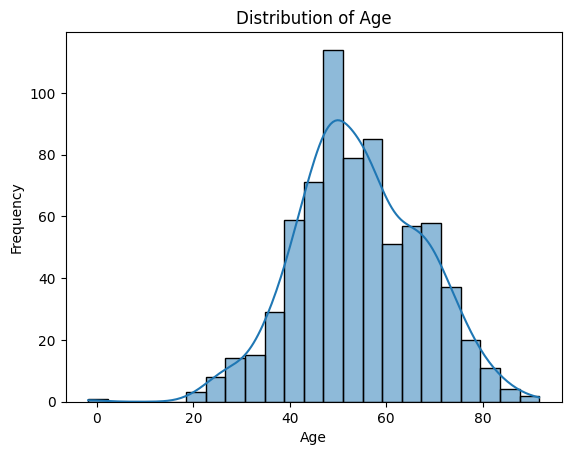

In [128]:
# 15 missing statuses, out of which 2 are repeated. MEANING we have 13 patients whos rupture status we donot know of.
# 32 missing age values, out of which 6 are repeated, we have 26 patients ages missing.

sns.histplot(df_dome['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [129]:
df_dome.fillna(0,inplace=True)
df_dome['age'] = df_dome['age'].replace(  -1.8,0)

df_ages_18_80 = df_dome[(df_dome['age']>18) & (df_dome['age']<80)]
df_ages_18_80


print(statistics.mean(df_ages_18_80['age']), '18-80') # Mean for the age group of {18-80} is 53.82
print(statistics.mean(df_dome['age']), '14-92') # Mean for the age group {14-92} 52.0604

53.82136752136752 18-80
52.0604 14-92


C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\3118796637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dome.fillna(0,inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\3118796637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dome['age'] = df_dome['age'].replace(  -1.8,0)


C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\652097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ages_18_80['age'] = df_ages_18_80['age'].replace(  0, 52.058)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17152\652097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dome['age'] = df_dome['age'].replace(  0, 53.82)


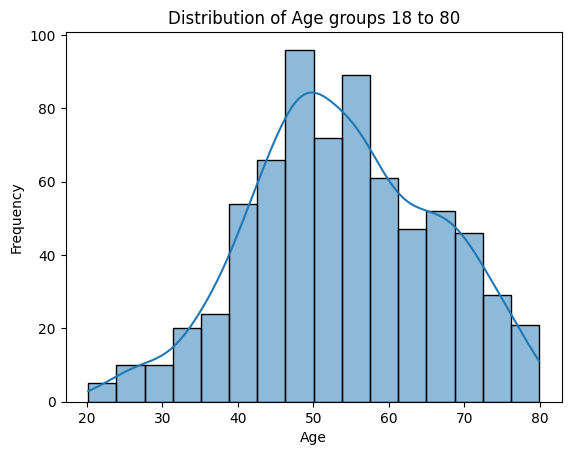

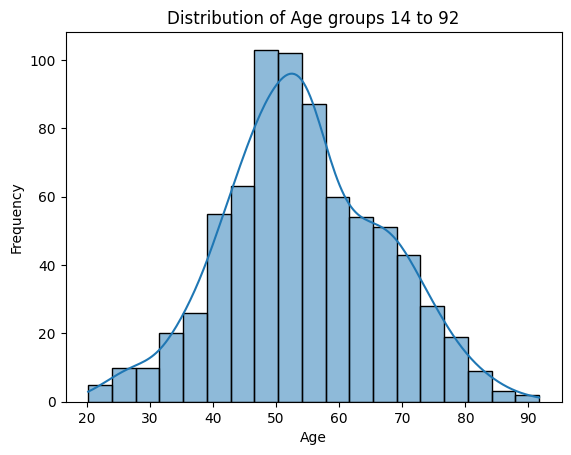

In [132]:

# Taking the average of different age groups, we replace them aptly to their df's
df_ages_18_80['age'] = df_ages_18_80['age'].replace(  0, 52.058)
df_dome['age'] = df_dome['age'].replace(  0, 53.82)

sns.histplot(df_ages_18_80['age'], kde=True)
plt.title('Distribution of Age groups 18 to 80')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_dome['age'], kde=True)
plt.title('Distribution of Age groups 14 to 92')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
